In [15]:
import pandas as pd
fish = pd.read_csv("https://bit.ly/fish_csv_data")
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [16]:
# How many different kinds of fish in the given dataframe?

print(pd.unique(fish["Species"]))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [17]:
# Column "species" will be the target and 5 other columnes will be input data

fish_input = fish[["Weight", "Length", "Diagonal", "Height", "Width"]].to_numpy()

print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [18]:
fish_target = fish["Species"].to_numpy()

print(fish_target[:5])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [19]:
# Prepare trainig set and data set

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [21]:
# Standardization preprocessing

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled  = ss.transform(test_input)

In [23]:
# Probability prediction of K-Nearest Neighbor algorithm for multiclass classification

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [25]:
print(pd.unique(fish["Species"]))
print(kn.classes_)

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [28]:
# According to the elicited model from the previous steps,
# predict the first 5 test data to know which type of fish are they.

print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [32]:
# Check the probability which is based on the previous predict decisions

import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 4))

# Bream Parkki Perch Pike Roach Smelt Whitefish

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [33]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


### Logistic Regression
It learns linear equations like linear regression algorithm. To fit with probability, it uses sigmoid(_logistic_) functions.



\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}}
\end{equation}


This ensures the extreme values(like `-infty` and `infty`) to be placed between `0` and `1`, which is the range of probability.

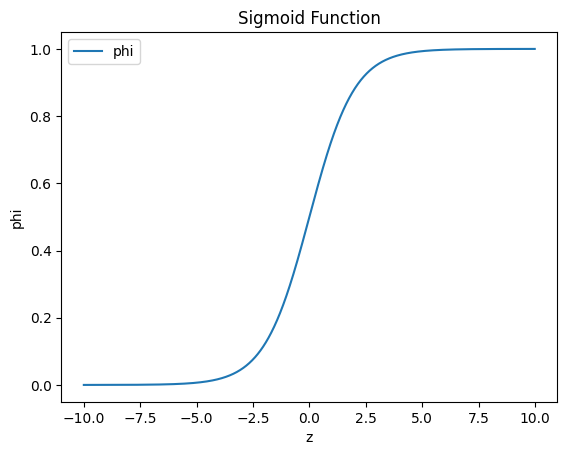

In [39]:
# Draw a sigmoid function with using numpy

import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-10, 10, 0.01)
phi = 1 / (1 + np.exp(-z))    # sigmoid expression

plt.plot(z, phi, label = "phi")
plt.xlabel('z')
plt.ylabel("phi")
plt.legend()
plt.title("Sigmoid Function")
plt.show()

In [40]:
# (Test) Binary classification with using logistic regression which uses sigmoid function

char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])    # boolean indexing

['A' 'C']


In [41]:
# To test the binary classification, first we are going to usse only bream and smelt

bream_smelt_indexes = (train_target == "Bream") | (train_target == "Smelt")

train_bream_smelt  = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [43]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [44]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [46]:
print(lr.classes_)
print(lr.predict_proba(train_bream_smelt[:5]))

['Bream' 'Smelt']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [49]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [50]:
# get z value

decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [51]:
# based on z value, calculate the probabilities through the sigmoid function

from scipy.special import expit

print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [52]:
# Multiclass classification with logistic regression

lr = LogisticRegression(C = 20, max_iter = 1000)
lr.fit(train_scaled, train_target)                # used all training data

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [53]:
# Predict the first 5 samples in the test set

print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [57]:
# Print the probabilities of the first 5 samples which is used to predict the result

print(lr.classes_)

proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 3))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [58]:
print(lr.coef_, lr.intercept_)
print(lr.coef_.shape, lr.intercept_.shape)

[[-1.49001259 -1.02909653  2.59342992  7.70358183 -1.20070797]
 [ 0.19618191 -2.01072007 -3.77974344  6.50492519 -1.99481478]
 [ 3.562807    6.34355461 -8.48969786 -5.75757213  3.79306162]
 [-0.10458363  3.60320663  3.93067948 -3.61740078 -1.7506979 ]
 [-1.40060998 -6.0750259   5.25969918 -0.87219289  1.86043812]
 [-1.38528461  1.49213609  1.39225441 -5.67734711 -4.40097409]
 [ 0.6215019  -2.32405484 -0.9066217   1.71600589  3.69369499]] [-0.09204689 -0.26289902  3.25100925 -0.14740759  2.65498221 -6.78787045
  1.38423249]
(7, 5) (7,)


In [59]:
# To manually calculate the probability, we are going to get z values from z1 ~ z7 (7 classes)
# then put them into softmax function.

decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals = 3))

[[ -6.498   1.032   5.164  -2.729   3.339   0.327  -0.634]
 [-10.859   1.927   4.771  -2.398   2.978   7.841  -4.26 ]
 [ -4.335  -6.233   3.174   6.487   2.358   2.421  -3.872]
 [ -0.683   0.453   2.647  -1.187   3.265  -5.753   1.259]
 [ -6.397  -1.993   5.816  -0.11    3.503  -0.112  -0.707]]


In [61]:
# to use softmax function, import softmax() embedded in scipy

from scipy.special import softmax

proba = softmax(decision, axis = 1)
print(np.round(proba, decimals = 3))    # same

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
